In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal
import soundfile as sf

In [2]:
# A1: Transform speech signal to spectral domain and plot amplitude part
def plot_spectral_components(y, sr):
    # FFT to transform speech signal to spectral domain
    D = np.fft.fft(y)

    # Plot the amplitude part of the spectral components
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D))
    plt.title('Spectral Components')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()

In [3]:
def plot_waveform(y, sr,title):
    """Plot the waveform of the audio signal."""
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [4]:
def apply_filter_and_listen(y, sr, filter_type):
    # FFT to transform speech signal to spectral domain
    D = np.fft.fft(y)

    # Define filter parameters based on filter type
    if filter_type == 'rectangular':
        # Rectangular filter
        cutoff = 2000  # Cutoff frequency in Hz
        order = 101    # Filter order (odd number to avoid Nyquist issue)
        b = signal.firwin(order, cutoff, fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'bandpass':
        # Bandpass filter
        lowcut = 1000   # Low cutoff frequency in Hz
        highcut = 4000  # High cutoff frequency in Hz
        order = 101     # Filter order (odd number to avoid Nyquist issue)
        b = signal.firwin(order, [lowcut, highcut], fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'highpass':
        # Highpass filter
        cutoff = 3000  # Cutoff frequency in Hz
        order = 100    # Filter order (even number)
        b = signal.firwin(order + 1, cutoff, fs=sr, pass_zero=False, scale=False)  # Increase order by 1

    # Adjust the length of the filter coefficients to match the length of the spectral components
    b_padded = np.pad(b, (0, len(D) - len(b)), mode='constant')

    # Apply filter to the spectrum
    D_filtered = D * b_padded

    # Inverse FFT to transform the filtered spectrum to time domain
    y_filtered = np.fft.ifft(D_filtered).real

    # Normalize the filtered signal to avoid clipping
    y_filtered /= np.max(np.abs(y_filtered))

    # Listen to the filtered sound
    plot_waveform(y_filtered,sr,filter_type)
    sf.write(f"filtered_{filter_type}.wav", y_filtered, sr)

In [5]:
def apply_other_filters_and_listen(y, sr):
    # Apply Cosine filter
    b_cosine = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True, window='cosine')

    # Pad the filter coefficients to match the length of the FFT result
    b_cosine_padded = np.pad(b_cosine, (0, len(y) - len(b_cosine)), mode='constant')

    # Apply filter to the spectrum
    D_cosine_filtered = np.fft.fft(y) * b_cosine_padded

    # Inverse FFT to transform the filtered spectrum to time domain
    y_cosine_filtered = np.fft.ifft(D_cosine_filtered).real

    # Normalize the filtered signal to avoid clipping
    y_cosine_filtered /= np.max(np.abs(y_cosine_filtered))

    # Write the filtered signal to a WAV file
    plot_waveform(y_cosine_filtered,sr,'y_cosine_filtered')
    sf.write("filtered_cosine.wav", y_cosine_filtered, sr)



# Generate the Gaussian window
    window = signal.gaussian(100, std=5)

    # Generate the FIR filter coefficients using firwin
    b_gaussian = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True)

    # Apply the Gaussian window to the filter coefficients
    b_gaussian *= window

    # Pad the filter coefficients to match the length of the input signal
    b_gaussian_padded = np.pad(b_gaussian, (0, len(y) - len(b_gaussian)), mode='constant')

    # Apply filter to the spectrum
    D_gaussian_filtered = np.fft.fft(y) * b_gaussian_padded

    # Inverse FFT to transform the filtered spectrum to time domain
    y_gaussian_filtered = np.fft.ifft(D_gaussian_filtered).real

    # Normalize the filtered signal to avoid clipping
    y_gaussian_filtered /= np.max(np.abs(y_gaussian_filtered))

    plot_waveform(y_gaussian_filtered,sr,"y_gaussian_filtered")
    # Write the filtered signal to a WAV file
    sf.write("filtered_gaussian.wav", y_gaussian_filtered, sr)

In [6]:
# Load the speech signal
y, sr = librosa.load(r"/content/vinod.rec.wav")

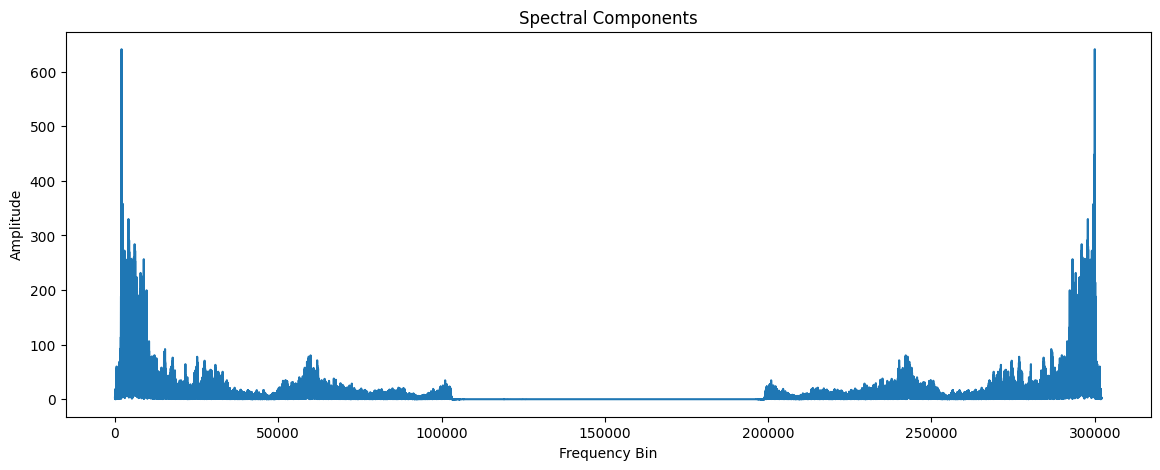

In [7]:
# Task A1
plot_spectral_components(y, sr)

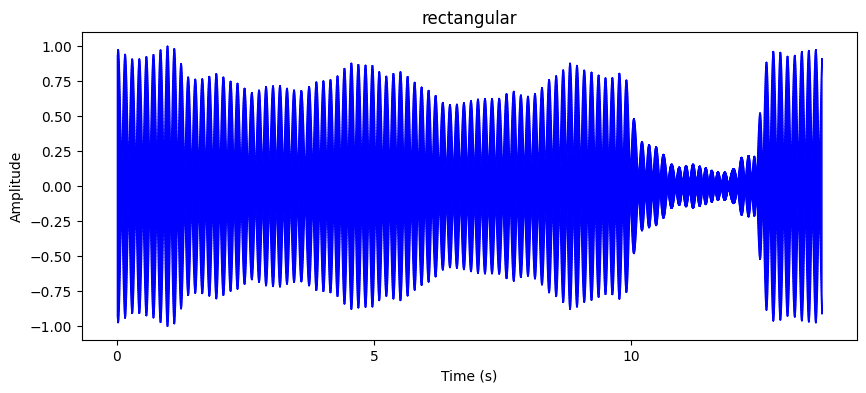

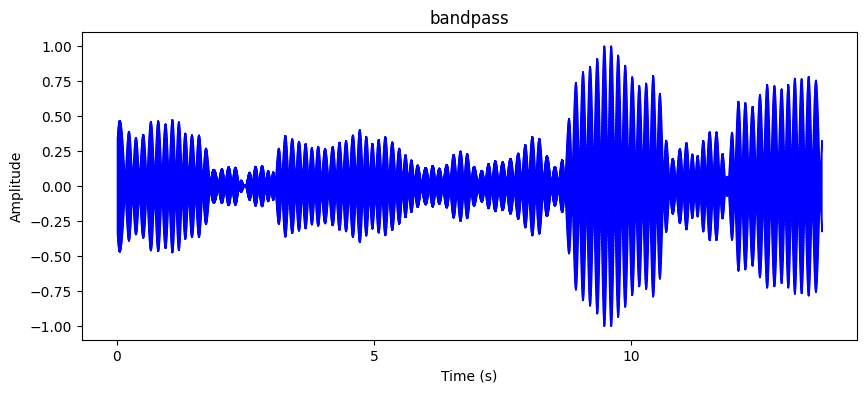

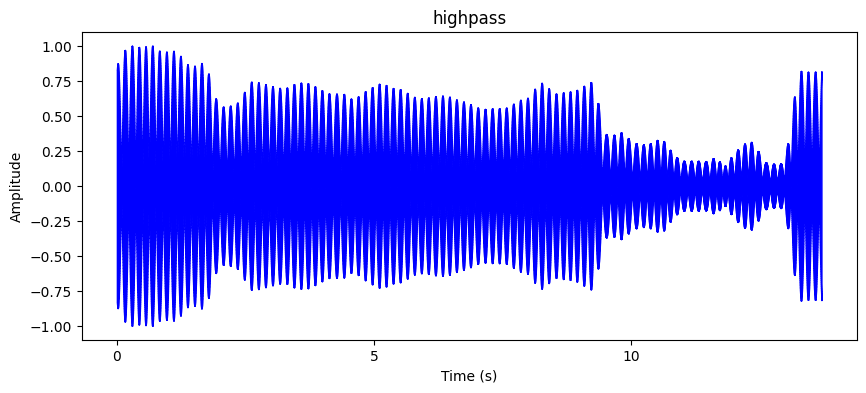

In [8]:
# Task A2
filter_types = ['rectangular', 'bandpass', 'highpass']
for filter_type in filter_types:
    apply_filter_and_listen(y, sr, filter_type)

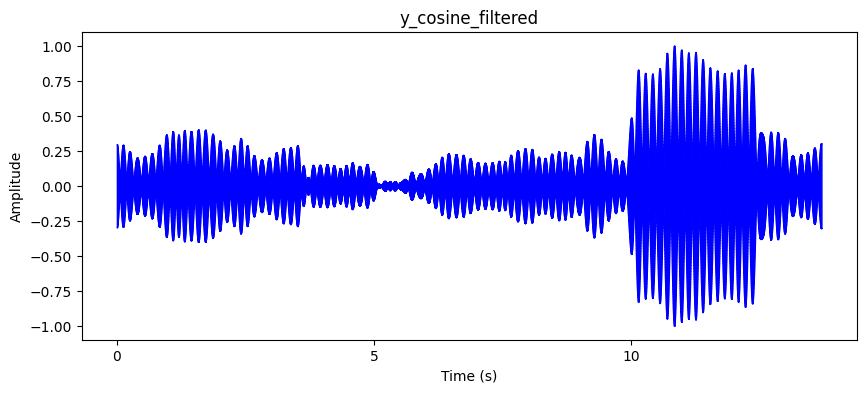

<ipython-input-5-ad2ae043ffd4>:24: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.gaussian(100, std=5)


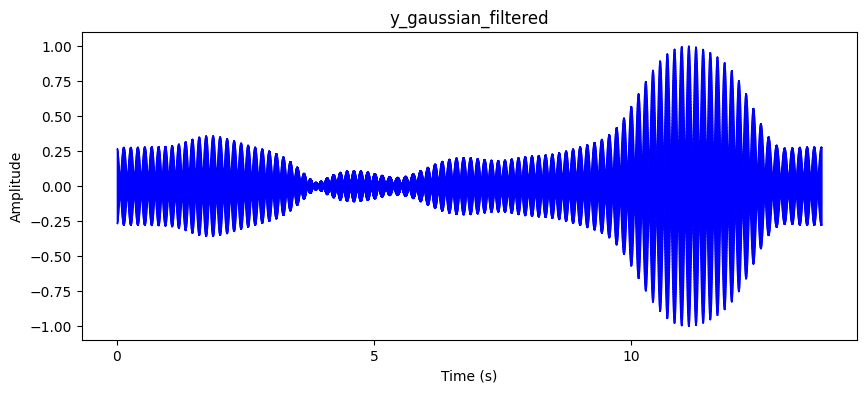

In [9]:
# Task A3
apply_other_filters_and_listen(y, sr)